### Import necessary libraries

In [35]:
import os
import io
import sys
import h5py
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm.auto import tqdm
sys.path.append('../..')
from definitions import DATA_DIR

In [12]:
import warnings
warnings.filterwarnings("ignore")

### Reproducibility

In [13]:
SEED = 1
random.seed(SEED)
np.random.seed(SEED)

### Global variables

### Paths

In [14]:
train_images_path = os.path.join(DATA_DIR, 'train-image.hdf5')
train_meta_path = os.path.join(DATA_DIR, 'train-metadata.csv')
test_images_path = os.path.join(DATA_DIR, 'test-image.hdf5')
test_meta_path = os.path.join(DATA_DIR, 'test-metadata.csv')

### Data loading

In [23]:
def show_images(ids, targets):
    fig, ax = plt.subplots(1, len(ids), figsize=(15, 5))
    for i, axi in enumerate(ax):
        img = Image.open(f'{DATA_DIR}/train-image/image/{ids[i]}.jpg')
        axi.imshow(img)
        axi.set_title(f'{ids[i]} - {'malignant' if targets[i] == 1 else 'benign'}')
        axi.axis('off')
    plt.show()

In [15]:
train_metadata = pd.read_csv(train_meta_path)

#### • Metadata

In [16]:
train_metadata.head().T

,0,1,2,3,4
isic_id,ISIC_0015670,ISIC_0015845,ISIC_0015864,ISIC_0015902,ISIC_0024200
target,0,0,0,0,0
patient_id,IP_1235828,IP_8170065,IP_6724798,IP_4111386,IP_8313778
age_approx,60.0,60.0,60.0,65.0,55.0
sex,male,male,male,male,male
anatom_site_general,lower extremity,head/neck,posterior torso,anterior torso,anterior torso
clin_size_long_diam_mm,3.04,1.1,3.4,3.22,2.73
image_type,TBP tile: close-up,TBP tile: close-up,TBP tile: close-up,TBP tile: close-up,TBP tile: close-up
tbp_tile_type,3D: white,3D: white,3D: XP,3D: XP,3D: white
tbp_lv_A,20.244422,31.71257,22.57583,14.242329,24.72552


#### • Images

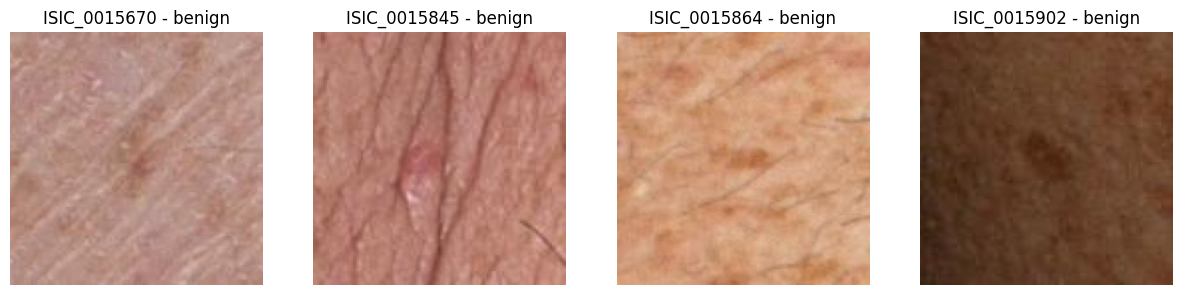

In [24]:
ids = train_metadata['isic_id'].values.tolist()[:4]
targets = train_metadata['target'].values.tolist()[:4]
show_images(ids, targets)

### Image samples from each class

#### • Benign samples

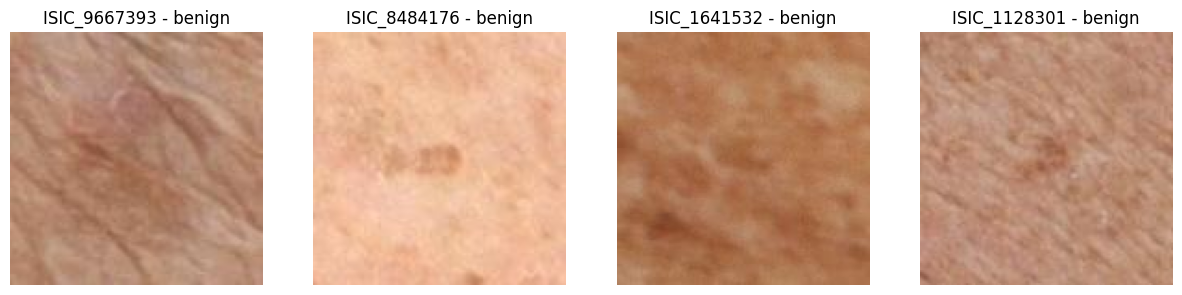

In [32]:
benign_samples = train_metadata[train_metadata['target'] == 0].sample(4, random_state=SEED)

ids = benign_samples['isic_id'].values.tolist()
targets = benign_samples['target'].values.tolist()

show_images(ids, targets)

#### • Malignant samples

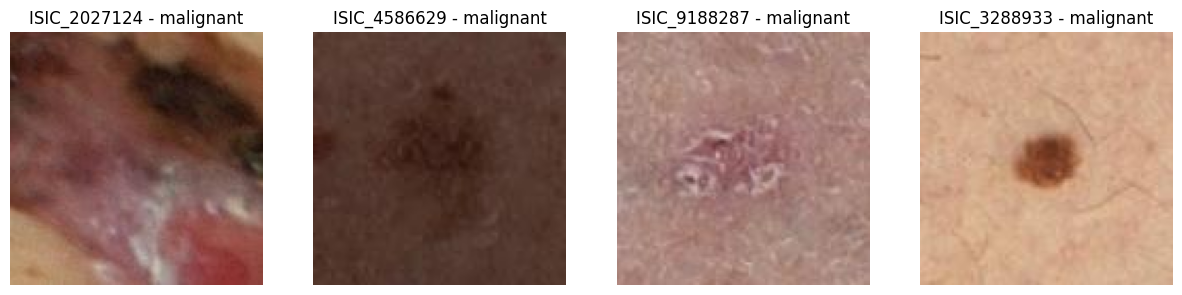

In [33]:
malignant_samples = train_metadata[train_metadata['target'] == 1].sample(4, random_state=SEED)

ids = malignant_samples['isic_id'].values.tolist()
targets = malignant_samples['target'].values.tolist()

show_images(ids, targets)